<a href="https://colab.research.google.com/github/Juacardonaca/SyS2025-II/blob/main/Completo_Taller2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Punto 1


# Para el cálculo de armonicos tenemos:

\begin{equation}
X[k] = \sum_{n=0}^{N-1}{x[n]e^{-j\frac{2\pi}{N}Kn}}
\end{equation}

La FFT usa el modelo discreto de la Transformada de Fourier para representar una señal periódica como la suma de armónicos senoidales discretos.

Divide la señal en N muestras y los coeficientes espectrales de X[k], que indican la amplitud y fase de cada frecuencia armónica múltiplo de la fundamental.

En conclusión la FFT descompone la señal en sus armónicos de forma rápida y eficiente, permitiendo conocer su magnitud y fase.

# Frecuencia de -3dB

La frecuencia de los -3dB es donde la potencia de salida se reduce al 50% que es donde empieza atenuarse la señal (o sea que la señal pierde intensidad)

# Canción favorita de youtube

In [ ]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

In [ ]:
link1="https://www.youtube.com/watch?v=a1Femq4NPxs"
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link1}

In [ ]:
!ffmpeg -y -i audio.mp3 output2.wav

In [ ]:
!pip install soundfile

In [ ]:
import soundfile as sf # para instalar pip install soundfile
#lee archivos wav
nombre_out2 = "output2.wav"
xb, fs2 = sf.read(nombre_out2)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs2,nombre_out2))

In [ ]:
from IPython.display import Audio
ns2 = 60 #se reproducen los primeros ns segundos
Audio(xb[:int(fs2*ns2),:].T,rate=fs2)

In [ ]:
from IPython.display import Audio
ns2 = 5 #se reproducen los primeros ns segundos
Audio(xb[:int(fs2*ns2),:].T,rate=fs2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xpro = xb.copy() #copiar archivos para procesar
ti = 10 #tiempo incio a procesar seg
tf = 15 #tiempo final a procesar seg
xs = xpro[int(ti*fs2):int((tf*fs2)),:]

tt = np.arange(ti,tf,1/fs2) # vector de tiempo
plt.plot(tt,xs)
plt.legend(('canal 1','canal 2'))
plt.xlabel('$t[s]$')
plt.ylabel('$x(t)$')
plt.legend()
plt.show()

In [ ]:
Xw = np.fft.rfft(xs,axis=0) # axis=0 permite aplicar fft por cada columna de xpro
#Xwc1 = np.fft.rfft(xs[:,0])
#Xwc2 = np.fft.rfft(xs[:,1])
vf = np.fft.rfftfreq(np.size(xs,0),1/fs2) #se crea el vector de frecuencias
plt.plot(vf,abs(Xw))#se grafica la magnitud
plt.legend(('canal 1','canal 2'))
plt.title(r'Espectro audio original')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|X[n]|$',fontsize = 14)
plt.show()

In [ ]:
#Pasa banda, apagando los armónicos que no nos interesan
#filtrar espectro
Xwf = Xw.copy()
f1 = 100 #frecuencia en Hz corte 1
f2 = 800 #frecuencia en Hz corte 2
ind = ~((vf > f1) & (vf < f2)) #frecuencias eliminar-> recueder que ~ actua como negación
Xwf[ind,:] = 0
plt.plot(vf,abs(Xwf))
plt.title(f"filtro pasa banda")
plt.legend(('canal 1','canal 2'))
plt.show()

In [ ]:
#Pasa baja
Xwf_lowpass = Xw.copy()
f_cutoff = 200 # Frecuencia de corte en Hz
ind_lowpass = vf > f_cutoff # Frecuencias a eliminar (mayores que la frecuencia de corte)
Xwf_lowpass[ind_lowpass,:] = 0
plt.plot(vf,abs(Xwf_lowpass))
plt.legend(('canal 1','canal 2'))
plt.title(f'Espectro audio con filtro pasa baja')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|X[n]|$',fontsize = 14)
plt.show()

In [ ]:
# filtro pasa alta
Xwf_highpass = Xw.copy()
f_cutoff_highpass = 1000 # Frecuencia de corte en Hz
ind_highpass = vf < f_cutoff_highpass # Frecuencias a eliminar (menores que la frecuencia de corte)
Xwf_highpass[ind_highpass,:] = 0
plt.plot(vf,abs(Xwf_highpass))
plt.legend(('canal 1','canal 2'))
plt.title(f'Espectro audio con filtro pasa alta')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|X[n]|$',fontsize = 14)
plt.show()

In [ ]:
# Filtro rechaza banda
Xwf_rechaza_banda = Xw.copy()
f_low = 800  # Frecuencia de corte inferior en Hz
f_high = 1000 # Frecuencia de corte superior en Hz
ind_bandstop = (vf > f_low) & (vf < f_high) # Frecuencias a eliminar (entre las frecuencias de corte)
Xwf_rechaza_banda[ind_bandstop,:] = 0
plt.plot(vf,abs(Xwf_rechaza_banda))
plt.legend(('canal 1','canal 2'))
plt.title(f'Espectro audio con filtro rechaza banda')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|X[n]|$',fontsize = 14)
plt.show()

# Detector de género musical

In [ ]:
#cargar datos desde drive acceso libre
#1UVHl8wyAafw1kgvke9IMi7fwUNv8ZswA
FILEID = "1Jdg7kchx27mHFX6fomjf6GwhLGJkT41H"
 #"1DxI5wQpqEWksw2BqJnG7n0IgNQ_xByX-"

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O  youtube.xlsx && rm -rf /tmp/cookies.txt
#!unzip -o codigos.zip
!dir

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file2 = 'youtube.xlsx'
X = pd.read_excel(file2)
X

In [ ]:
#instalar librerias necesarias para descargar audios youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile

# Paquete de carga de cookies para el control anti-bots captcha
!pip install browser-cookie3

import os
import yt_dlp as youtube_dl
import browser_cookie3

try:
    cookies = browser_cookie3.firefox()
except:
    print("No se pueden descargar cookies desde firefox. Intentando Chrome...")
    try:
        cookies = browser_cookie3.chrome()
    except:
        print("No se pueden descargar cookies desde Chrome. Por favor asegúrate de estar logueado en Youtube desde tu navegador.")
        cookies = None

#funcion para descargar mp3 desde youtube
def download_ytvid_as_mp3(video_url,name):
    print(f"Processing video: {video_url}") # Add this line to show which video is being processed
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':f'{name}.mp3',
        'noplaylist': True, # Keep this line
    }
    if cookies:
        options['cookiefile'] = None
        options['cookiejar'] = cookies;

    with youtube_dl.YoutubeDL(options) as ydl:
        try:
            # Extract info with noplaylist option
            video_info = ydl.extract_info(video_url, download=False)
            # Use the direct video URL if available, otherwise use the webpage URL
            ydl.download([video_info.get('url', video_info['webpage_url'])])
            print(f"Download complete for {video_url}") # Modify this line
        except Exception as e:
            print(f"Error descargando {video_url}: {e}")

In [ ]:
import subprocess
import os

#crear carpeta con resultados
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

#recorrer excel con videos
N, P = X.shape
Ns = N * 5 #cantidad de segmentos por cancion

for n in range(N):
    print(f"video {n+1} de {N}")
    print(f"link: {X.loc[n,'link']}\n")
    print(f"band: {X.loc[n,'band']}\n")
    print(f"type: {X.loc[n,'type']}\n")
    #ruta video n-th
    name_ = 'results/'+X.loc[n,'band']+"_"+str(n)+"_"+str(X.loc[n,'type_num']) # #video+nombre+tipo de genero musical
    #descargar mp3 desde youtube
    try: # Added try block to catch download errors
        download_ytvid_as_mp3(X.loc[n,'link'],name_)
        #convertir a .wav
        subprocess.call(['ffmpeg','-y', '-i', name_+'.mp3',
                       name_+'.wav'])
    except youtube_dl.utils.DownloadError as e: # Catch the specific DownloadError
        print(f"Skipping video {X.loc[n,'link']} due to download error: {e}") # Print a message and skip

# 1.2 Serie de Fourier

Semejanzas : Las tres representan la misma señal periódica, contienen los mismos armónicos.

Diferencias :


*   La trigonométrica representa senos y cosenos, la exponencial complejas, y la compacta coseno con fase.
*   La trigonométrica se usa más para señales reales, cuando hay simetría; la exponencial se usa para transformadas; Y la exponencial para visualización.




#1.3 Función de densidad Espectral


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

# Parámetros de simulación
Fs = 1000        # frecuencia de muestreo
T = 1/Fs
t = np.arange(-1, 1, T)
alpha = 2
wc = 20
ws = 10

# a) e^{-α|t|}
x1 = np.exp(-alpha*np.abs(t))

# b) cos(wc t)
x2 = np.cos(wc*t)

# c) sin(ws t)
x3 = np.sin(ws*t)

# d) f(t)cos(wc t), con f(t)=e^{-α|t|}
x4 = x1 * np.cos(wc*t)

# e) e^{-α t^2}
x5 = np.exp(-alpha*t**2)

# Función auxiliar para graficar señal y espectro
def graficar_fft(x, titulo):
    N = len(x)
    X = fftshift(np.abs(fft(x)))
    f = fftshift(fftfreq(N, T))
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(t, x)
    plt.title(titulo + " (Tiempo)")
    plt.xlabel("t [s]")
    plt.grid(True)
    plt.subplot(1,2,2)
    plt.plot(f, X)
    plt.title(titulo + " (Espectro)")
    plt.xlabel("Frecuencia [Hz]")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Graficar cada señal
graficar_fft(x1, "a) e^{-α|t|}")
graficar_fft(x2, "b) cos(wc t)")
graficar_fft(x3, "c) sin(ws t)")
graficar_fft(x4, "d) e^{-α|t|}cos(wc t)")
graficar_fft(x5, "e) e^{-αt^2}")


#1.4 Propiedades transformada

In [ ]:
# a) F{ e^{-j w1 t} cos(wc t) }
w1 = 10
x_a = np.exp(-1j*w1*t) * np.cos(wc*t)
graficar_fft(np.real(x_a), "a) e^{-j w1 t} cos(wc t)")

# b) F{ u(t) cos^2(wc t) } – usando u(t) ≈ función escalón
u = np.heaviside(t, 1)
x_b = u * (np.cos(wc*t)**2)
graficar_fft(x_b, "b) u(t) cos²(wc t)")

# c) F{ t e^{-a t} u(t) } – ejemplo de convolución en frecuencia
x_c = t * np.exp(-alpha*t) * u
graficar_fft(x_c, "c) t e^{-a t} u(t)")


#1.5 Modulación por amplitud

La modulación en amplitud (AM) es una técnica usada en comunicaciones analógicas donde la amplitud de una señal portadora (una onda senoidal de alta frecuencia) se varía en proporción a la amplitud instantánea de una señal de información o mensaje (por ejemplo, voz o música).

La detección coherente (también llamada demodulación síncrona) es un método para recuperar la señal original del mensaje desde la señal modulada Am.
Se llama coherente porque el receptor usa una portadora local con la misma frecuencia y fase que la portadora usada en el transmisor.

Aplicaciones principales:


*   Radiofusión AM clásica.
*   Comunicaciones aéreas y marítimas.
*   Sistemas de comunicación digital.
*   Procesamiento de señales biomédicas y experimentos de laboratorio, para demodular señales fisiológicas moduladas.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parámetros
Fs = 1000       # frecuencia de muestreo
t = np.linspace(0, 1, Fs)
Fc = 50         # frecuencia portadora
Fm = 5          # frecuencia del mensaje
m_index = 0.5   # índice de modulación

# Señal mensaje y portadora
m_t = np.cos(2*np.pi*Fm*t)             # mensaje
c_t = np.cos(2*np.pi*Fc*t)             # portadora
y_t = (1 + m_index * m_t) * c_t        # señal AM

# Gráficas en tiempo
plt.plot(t, y_t)
plt.title("Señal AM en el tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

# Espectro en frecuencia
Y = np.abs(fft(y_t))[:Fs//2]
f = fftfreq(Fs, 1/Fs)[:Fs//2]
plt.plot(f, Y)
plt.title("Espectro de la señal AM")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("|Y(f)|")
plt.grid(True)
plt.show()


#1.6 Aplicación en comunicaciones

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

# Suponemos que ya tienes:
# xb → señal de audio (mensaje)
# fs2 → frecuencia de muestreo

# Normalizar señal del mensaje m(t) entre -1 y 1
m = xb[:,0] if xb.ndim > 1 else xb   # usar canal izquierdo si es estéreo
m = m / np.max(np.abs(m))

# Parámetros de la portadora
Ac = 1.0       # amplitud de la portadora
fc = 5000      # frecuencia de la portadora (5 kHz)
t = np.arange(len(m)) / fs2

# Señal portadora
c = Ac * np.cos(2 * np.pi * fc * t)

# Índice de modulación (puedes probar con 0.3, 0.5 o 1)
ka = 0.5

# Señal modulada en amplitud
y = (1 + ka * m) * c

# Graficar una parte pequeña (por ejemplo, 2 ms) para ver forma de onda
plt.figure(figsize=(10,4))
plt.plot(t[:int(fs2*0.002)], y[:int(fs2*0.002)])
plt.title("Señal AM (fragmento de 2 ms)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

# Escuchar la señal AM modulada
Audio(y, rate=fs2)


#1.7 Aplicación en circuitos eléctricos

La distorsión total de armónicos (THD) es una medida que indica cuánto se aleja una señal de su forma de onda senoidal ideal debido a la presencia de armónicos.

En un sistema eléctrico, cuando la corriente o el voltaje no son senoidales puros, aparecen componentes armónicas generadas por cargas no lineales, como:

Fuentes conmutadas,
Motores de velocidad variable,
Rectificadores,
Equipos electrónicos modernos.

El THD se expresa como un porcentaje, y representa la relación entre la energía contenida en los armónicos y la energía de la componente fundamental.

El **factor de potencia** indica qué tan eficientemente se utiliza la energía eléctrica.

Cuando existen armónicos, la corriente deja de ser senoidal, lo que aumenta la potencia aparente sin aumentar la potencia activa, reduciendo así el factor de potencia. Aunque el FP clásico considera solo el ángulo de fase, el FP total (que incluye distorsión) se calcula considerando tanto el desfase como el THD.

La **Transformada Rápida de Fourier** (FFT) permite descomponer una señal en sus componentes de frecuencia.
A partir del espectro, se mide la amplitud de la frecuencia fundamental y de sus armónicos (2°, 3°, 4°, etc.).

Así se obtiene el THD como la proporción entre la suma de los armónicos y la fundamental.
Este método se usa comúnmente en software como MATLAB, Python, o instrumentos de laboratorio (analizadores de potencia o calidad eléctrica).

In [ ]:
# Necesario: numpy, scipy, matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift
from scipy.integrate import odeint

# -------------------------
# Parámetros generales
# -------------------------
f = 50.0          # frecuencia de la red (Hz)
w = 2*np.pi*f
Vm = 325.0        # pico (por ejemplo 230Vrms -> Vm ≈ 230*sqrt(2)=325V)
Fs = 20000        # frecuencia de muestreo (debe ser >> armónicos)
T = 1/f
t = np.arange(0, 10*T, 1/Fs)   # simular 10 ciclos

# función de fuente sinusoide
v_s = Vm * np.sin(w * t)

# señal rectificada de onda completa (puente ideal)
v_rect = np.abs(v_s)

# -------------------------
# Caso (i): carga resistiva R
# -------------------------
def simulate_resistive(R):
    i_r = v_rect / R             # corriente inmediata
    return i_r

# -------------------------
# Caso (ii): carga R-C en serie
#   Ecuación: dvC/dt = (v_rect - vC) / (R*C)
#   corriente i = C * dvC/dt = (v_rect - vC)/R
# -------------------------
def simulate_RC(R, C):
    # resolver ODE para vC usando Euler/odeint
    def dvdt(vC, tt):
        # find v_rect at time tt (interpolate)
        v_in = np.abs(Vm * np.sin(w * tt))
        dv = (v_in - vC) / (R * C)
        return dv
    vC0 = 0.0
    vC = odeint(dvdt, vC0, t, atol=1e-8, rtol=1e-6).flatten()
    i_rc = (np.abs(Vm * np.sin(w * t)) - vC) / R
    return i_rc, vC

# -------------------------
# Funciones auxiliares FFT, THD, PF
# -------------------------
def compute_fft_components(x, Fs, f0, n_harm=25):
    """
    Devuelve magnitudes (RMS) y fases de armónicos 1..n_harm
    asumiendo que x es tiempo real y f0 es la frecuencia fundamental.
    """
    N = len(x)
    X = fft(x)
    freqs = fftfreq(N, 1/Fs)
    # Solo lado positivo:
    # Para cada armonico k, buscaremos el bin más cercano a k*f0
    I_rms = []
    I_phase = []
    for k in range(1, n_harm+1):
        fk = k * f0
        idx = np.argmin(np.abs(freqs - fk))
        # amplitud complejo (no normalizo por N aqui: la amplitud real es 2*|X[idx]|/N para seno real)
        A = X[idx]
        # Convertir a pico: A_pico = 2 * |A| / N
        A_pico = 2.0 * np.abs(A) / N
        # RMS:
        I_k = A_pico / np.sqrt(2)
        phase = np.angle(A)
        I_rms.append(I_k)
        I_phase.append(phase)
    return np.array(I_rms), np.array(I_phase)

def compute_thd_from_rms(I_rms):
    I1 = I_rms[0]
    if I1 == 0:
        return np.nan
    Ih_sq = np.sum(I_rms[1:]**2)
    thd = np.sqrt(Ih_sq) / I1
    return thd

def compute_power_factor(v_time, i_time, Fs, f0, I_rms, I_phase):
    # Potencia real:
    P_inst = v_time * i_time
    P_real = np.mean(P_inst)
    V_rms = np.sqrt(np.mean(v_time**2))
    I_rms_total = np.sqrt(np.mean(i_time**2))
    PF_total = P_real / (V_rms * I_rms_total)
    # displacement PF: cos(phi) where phi = phase difference between V1 and I1
    # get fundamental of voltage:
    N = len(v_time)
    V = fft(v_time)
    freqs = fftfreq(N, 1/Fs)
    idx_v1 = np.argmin(np.abs(freqs - f0))
    A_v1 = 2.0 * np.abs(V[idx_v1]) / N
    phase_v1 = np.angle(V[idx_v1])
    # I1 phase is I_phase[0]
    phase_i1 = I_phase[0]
    phi = phase_v1 - phase_i1
    V1_rms = A_v1 / np.sqrt(2)
    I1_rms = I_rms[0]
    PF_disp = (V1_rms * I1_rms * np.cos(phi)) / (V_rms * I_rms_total)
    return PF_total, PF_disp, P_real, V_rms, I_rms_total, phi

# -------------------------
# Ejecutar simulación para varios casos
# -------------------------
# parámetros de prueba
R_values = [10.0, 50.0, 200.0]   # ohm
C_values = [10e-6, 47e-6, 100e-6]  # F

results = []

for R in R_values:
    # caso resistivo
    i_r = simulate_resistive(R)
    I_rms, I_phase = compute_fft_components(i_r, Fs, f, n_harm=25)
    thd = compute_thd_from_rms(I_rms)
    PF_total, PF_disp, P_real, V_rms, I_rms_total, phi = compute_power_factor(v_s, i_r, Fs, f, I_rms, I_phase)
    results.append(('R', R, None, thd, PF_total, PF_disp, V_rms, I_rms_total))
    print(f"Resistiva R={R} ohm -> THD={thd:.4f}, PF_total={PF_total:.4f}, PF_disp={PF_disp:.4f}, I_rms={I_rms_total:.3f} A")

    # caso RC (usar un C representativo, por ejemplo 47uF)
    for C in C_values:
        i_rc, vC = simulate_RC(R, C)
        I_rms_rc, I_phase_rc = compute_fft_components(i_rc, Fs, f, n_harm=25)
        thd_rc = compute_thd_from_rms(I_rms_rc)
        PF_total_rc, PF_disp_rc, P_real_rc, V_rms_rc, I_rms_total_rc, phi_rc = compute_power_factor(v_s, i_rc, Fs, f, I_rms_rc, I_phase_rc)
        results.append(('RC', R, C, thd_rc, PF_total_rc, PF_disp_rc, V_rms_rc, I_rms_total_rc))
        print(f"RC R={R} ohm, C={C*1e6:.1f}uF -> THD={thd_rc:.4f}, PF_total={PF_total_rc:.4f}, PF_disp={PF_disp_rc:.4f}, I_rms={I_rms_total_rc:.3f} A")

# -------------------------
# Graficar ejemplo: una combinación
# -------------------------
Rsel = 50.0
Csel = 47e-6
i_r = simulate_resistive(Rsel)
i_rc, vC = simulate_RC(Rsel, Csel)

plt.figure(figsize=(12,6))
plt.subplot(3,1,1)
plt.plot(t[:2000], v_s[:2000])
plt.title("Tensión de red (sinusoidal) - primeros instantes")
plt.ylabel("v_s [V]")
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(t[:2000], v_rect[:2000])
plt.title("Tensión rectificada (|v_s|)")
plt.ylabel("v_rect [V]")
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(t[:2000], i_rc[:2000])
plt.title(f"Corriente (R={Rsel}Ω, C={Csel*1e6:.1f}uF)")
plt.ylabel("i(t) [A]")
plt.xlabel("Tiempo [s]")
plt.grid(True)
plt.tight_layout()
plt.show()


#1.8 STREAMLIT

In [ ]:
#instalación de librerías
!pip install streamlit -q
# app.py
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.integrate import odeint

st.title("Dashboard: Modulación AM y Aplicación Potencia (THD / PF)")

#Panel
st.sidebar.header("Simulación rectificador (1.7)")
f = st.sidebar.number_input("Frecuencia de red (Hz)", value=50.0)
Vm = st.sidebar.number_input("Vm (pico V)", value=325.0)
Fs = st.sidebar.number_input("Frecuencia de muestreo (Hz)", value=20000)
Tsim_cycles = st.sidebar.number_input("Número de ciclos a simular", value=6)
t = None

load_type = st.sidebar.selectbox("Tipo de carga", ["Resistiva", "R-C serie"])
R = st.sidebar.number_input("R [Ω]", value=50.0)
C = None
if load_type == "R-C serie":
    C = st.sidebar.number_input("C [F]", value=47e-6, format="%.6e")

#Generar señal
f = float(f)
w = 2*np.pi*f
T = 1.0/f
t = np.arange(0, Tsim_cycles * T, 1.0/Fs)
v_s = Vm * np.sin(w * t)
v_rect = np.abs(v_s)

st.write("Señal de entrada y rectificada (primeros instantes):")
fig, ax = plt.subplots(2,1,figsize=(8,5))
ax[0].plot(t[:1000], v_s[:1000])
ax[0].set_title("v_s (sin)")
ax[1].plot(t[:1000], v_rect[:1000])
ax[1].set_title("|v_s| (rectificada)")
st.pyplot(fig)

#Simular cargas
if load_type == "Resistiva":
    i = v_rect / R
    st.write(f"Corriente en carga resistiva (R={R}Ω)")
else:
    def dvdt(vC, tt):
        v_in = np.abs(Vm * np.sin(w * tt))
        return (v_in - vC) / (R * C)
    vC = odeint(dvdt, 0.0, t).flatten()
    i = (np.abs(Vm * np.sin(w * t)) - vC) / R
    st.write(f"Corriente en carga R={R}Ω, C={C}F")

fig2, ax2 = plt.subplots(1,1,figsize=(8,3))
ax2.plot(t[:1000], i[:1000])
ax2.set_title("Corriente i(t) - primeros instantes")
st.pyplot(fig2)

#FFT y THD
def fft_harmonics(x, Fs, f0, n_harm=25):
    N = len(x)
    X = fft(x)
    freqs = fftfreq(N, 1/Fs)
    I_rms = []
    I_phase = []
    for k in range(1, n_harm+1):
        idx = np.argmin(np.abs(freqs - k*f0))
        A = X[idx]
        A_pico = 2*np.abs(A)/N
        I_k = A_pico/np.sqrt(2)
        I_rms.append(I_k)
        I_phase.append(np.angle(A))
    return np.array(I_rms), np.array(I_phase), freqs, X

I_rms, I_phase, freqs, X = fft_harmonics(i, Fs, f, n_harm=30)
THD = np.sqrt(np.sum(I_rms[1:]**2)) / (I_rms[0] + 1e-12)
st.write(f"THD (estimado con {len(I_rms)-1} armónicos): {THD:.4f}")

# pfactor de potencia
P_real = np.mean(v_s * i)
V_rms = np.sqrt(np.mean(v_s**2))
I_rms_total = np.sqrt(np.mean(i**2))
PF_total = P_real / (V_rms * I_rms_total)
st.write(f"Potencia real P = {P_real:.3f} W, V_rms = {V_rms:.3f} V, I_rms = {I_rms_total:.3f} A")
st.write(f"Factor de potencia (total) = {PF_total:.4f}")

#fase entre V1 y I1
N = len(i)
V = fft(v_s)
idx_v1 = np.argmin(np.abs(freqs - f))
A_v1 = 2.0 * np.abs(V[idx_v1]) / N
phase_v1 = np.angle(V[idx_v1])
phi = phase_v1 - I_phase[0]
PF_disp = (A_v1/np.sqrt(2) * I_rms[0] * np.cos(phi)) / (V_rms * I_rms_total)
st.write(f"Displacement PF (por la fundamental) = {PF_disp:.4f}, desfase φ (rad) = {phi:.3f}")


fig3, ax3 = plt.subplots(1,1,figsize=(8,3))
mask = freqs >= 0
ax3.plot(freqs[mask], np.abs(X[mask]) * 2.0 / N)  # pico doble lado
ax3.set_xlim(0, f*30)
ax3.set_title("Espectro de la corriente (picos)")
ax3.set_xlabel("Hz")
st.pyplot(fig3)

st.sidebar.write("Notas: el modelo usa diodos ideales; el resultado muestra tendencias generales.")


In [ ]:
%%writefile Taller2.py
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.fft import fft, fftfreq, fftshift

st.set_page_config(page_title="Potencia", page_icon="⚡")

st.title("Aplicaciones en Comunicaciones y Potencia ⚡🎧")

# Sección 1: Modulación AM
st.header("1️⃣ Modulación en Amplitud (AM)")

fs = 48000
t = np.linspace(0, 0.01, int(fs*0.01))
m = np.sin(2*np.pi*200*t)  # señal mensaje
Ac = 1.0
fc = st.slider("Frecuencia portadora (Hz)", 1000, 10000, 5000)
ka = st.slider("Índice de modulación (ka)", 0.0, 1.0, 0.5)

c = Ac * np.cos(2*np.pi*fc*t)
y = (1 + ka*m) * c

fig1, ax1 = plt.subplots()
ax1.plot(t[:1000], y[:1000])
ax1.set_title("Señal AM (fragmento de 1000 muestras)")
ax1.set_xlabel("Tiempo [s]")
ax1.set_ylabel("Amplitud")
st.pyplot(fig1)

st.markdown("**Observación:** Al aumentar el índice de modulación, la amplitud de la envolvente cambia, representando mejor la información del mensaje.")

# Sección 2: Distorsión Armónica (THD)
st.header("2️⃣ Distorsión Total de Armónicos (THD)")

f1 = 60
# Señal distorsionada (armónicos 3 y 5)
x = np.sin(2*np.pi*f1*t) + 0.2*np.sin(2*np.pi*3*f1*t) + 0.1*np.sin(2*np.pi*5*f1*t)

# FFT
N = len(x)
X = np.abs(fft(x))[:N//2]
freqs = np.fft.fftfreq(N, 1/fs)[:N//2]

fundamental = np.argmax(X[1:]) + 1
harmonics = np.sqrt(np.sum(X[2*fundamental:]**2))
THD = 100 * harmonics / X[fundamental]

st.write(f"**THD estimado ≈ {THD:.2f}%**")

fig2, ax2 = plt.subplots()
ax2.plot(freqs, X)
ax2.set_title("Espectro de la señal distorsionada")
ax2.set_xlabel("Frecuencia [Hz]")
ax2.set_ylabel("Amplitud")
st.pyplot(fig2)

st.markdown("""
**Conclusión:**
El THD mide cuánta energía de la señal está en los armónicos.
Una señal más "sucia" (con más distorsión) tiene un THD más alto.
Esto afecta el factor de potencia y la calidad de energía en circuitos eléctricos.
""")

st.success("✅ Dashboard cargado correctamente: incluye Modulación AM y THD.")


In [ ]:
!pip install -q streamlit
!wget -q https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64 -O /usr/local/bin/cloudflared
!chmod +x /usr/local/bin/cloudflared


In [ ]:
import time, re
from pathlib import Path
import subprocess

# Iniciar Streamlit en background
!streamlit run app.py --server.port 8501 --server.headless true > /content/streamlit.log 2>&1 &

# Iniciar Cloudflared para exponer el puerto
!cloudflared tunnel --url http://localhost:8501 > /content/cloudflared.log 2>&1 &

# Esperar y buscar la URL pública
time.sleep(8)
url = None
if Path("/content/cloudflared.log").exists():
    txt = Path("/content/cloudflared.log").read_text()
    m = re.search(r"https?://[^\s]+trycloudflare[^\s]*", txt)
    if m:
        url = m.group(0)

if url:
    print("Tu aplicación está disponible en:")
    print(url)
else:
    print("No se encontró la URL. Ejecuta de nuevo esta celda en 5 segundos.")


#Parte 2

#2.3
Linealidad e invarianza en el tiempo

In [ ]:
import numpy as np
from scipy.signal import medfilt

# Señales de prueba
n = np.arange(10)
x1 = np.array([1,2,3,4,5,6,7,8,9,10], dtype=float)
x2 = np.array([2,1,0,-1,-2,1,0,2,1,3], dtype=float)

# --- Sistema 1 ---
def H1(x):
    y = np.zeros_like(x)
    for i in range(1, len(x)):
        y[i] = x[i]/3 + 2*x[i-1] - y[i-1]
    return y

# --- Sistema 2 ---
def H2(x):
    return np.array([np.sum(x[:i+1]**2) for i in range(len(x))])

# --- Sistema 3 ---
def H3(x):
    return medfilt(x, kernel_size=3)

# --- Sistema 4 ---
def H4(x, A=2, B=1):
    return A*x + B

# --- Prueba de linealidad ---
def prueba_linealidad(H, x1, x2, a=2, b=3):
    y1 = H(a*x1 + b*x2)
    y2 = a*H(x1) + b*H(x2)
    return np.allclose(y1, y2)

# --- Prueba de invariancia ---
def prueba_invariancia(H, x, n0=1):
    y = H(x)
    x_shift = np.roll(x, n0)
    y_shift = np.roll(y, n0)
    return np.allclose(H(x_shift), y_shift)

sistemas = [H1, H2, H3, lambda x: H4(x, A=2, B=1)]
nombres = ["y[n]=x[n]/3+2x[n-1]-y[n-1]",
           "y[n]=∑x²[k]",
           "y[n]=median(x[n])",
           "y(t)=Ax(t)+B"]

for i, H in enumerate(sistemas):
    print(f"--- Sistema {i+1}: {nombres[i]} ---")
    print("Lineal:", prueba_linealidad(H, x1, x2))
    print("Invariante en el tiempo:", prueba_invariancia(H, x1))
    print()


#2.4 Salida de un SLIT

In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import convolve
import numpy as np # Import numpy here as well

# Señales dadas
x = np.array([-15, 5, -3, 0, 5, 7, -1])
h = np.array([1, -2, 0, 1, -2])

# Convolución discreta
y = convolve(x, h, mode='full')

# Graficar
n_y = np.arange(len(y))
plt.stem(n_y, y) # Removed use_line_collection=True
plt.title("Salida del SLIT: y[n] = x[n] * h[n]")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid(True)
plt.show()

print("Salida y[n]:", y)

In [ ]:
h2 = np.array([-1, 6, -10, 3, 1, -10, 2, 5])
y2 = convolve(x, h2, mode='full')
plt.stem(y2)
plt.title("Respuesta al escalón")
plt.show()


#2.5 Señal Gaussiana

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# Parámetros
a, b, B = 1.0, 0.5, 2.0
t = np.linspace(-5, 5, 1000)
x = np.exp(-a*t**2)

# Sistema A
yA = x**2

# Sistema B (respuesta al impulso)
hB = B*np.exp(-b*t**2)

# Salida total (convolución)
y = convolve(yA, hB, mode='same') / len(t)

plt.figure()
plt.plot(t, x, label="x(t) = e^{-a t^2}")
plt.plot(t, yA, label="yA(t) = x²(t)")
plt.plot(t, y, label="y(t) = yA * hB")
plt.legend()
plt.title("Salida de los sistemas en serie")
plt.xlabel("t")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()


#2.6 Transformada de LaPlace

In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

# Definimos polos, ceros y ganancia
zeros = [0]
poles = [-1]
K = 2

# Creamos la función de transferencia
num, den = signal.zpk2tf(zeros, poles, K)
system = signal.lti(num, den)

# Mostrar la función de transferencia
print("X(s) =", K, "* (s -", zeros[0], ")/(s - (", poles[0], "))")
print("Numerador:", num)
print("Denominador:", den)

# Graficar polos y ceros
plt.figure(figsize=(5,5))
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)

plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='blue', label='Ceros')
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='red', label='Polos')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('Re{s}')
plt.ylabel('Im{s}')
plt.title('Gráfico de Polos y Ceros - X(s) = 2s / (s + 1)')
plt.grid(True)
plt.legend()
plt.show()


#2.7 Propiedades transformada LaPlace

In [ ]:
# Transformada de Laplace de e(t)*sin(w0*t)
import sympy as sym
sym.init_printing()  # para mostrar en pantalla

# Definir las variables simbólicas
t, w0 = sym.symbols('t w0', real=True, positive=True)
s = sym.symbols('s', complex=True)

# Señal causal (multiplicada por u(t))
x = sym.sin(w0 * t) * sym.Heaviside(t)

# Calcular la transformada de Laplace
X = sym.laplace_transform(x, t, s)
X


In [ ]:
# Simplificar la expresión
H = sym.simplify(X[0])
H

In [ ]:
# Separar numerador y denominador
num, den = sym.fraction(H)

# Calcular ceros y polos
ceros = sym.solve(num, s)
polos = sym.solve(den, s)

print("Ceros:", ceros)
print("Polos:", polos)

#No hay ceros porque el numerador es una constante

#2.8 Demostrar

In [ ]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

sym.init_printing()

# símbolos
t, s, a, w0, t0 = sym.symbols('t s a w0 t0', real=True)
s = sym.symbols('s', complex=True)

# Heaviside (causalidad)
u = sym.Heaviside

alpha = sym.symbols('alpha', positive=True)

x = sym.exp(-alpha * t) * u(t)          # x(t)
X = sym.laplace_transform(x, t, s)
X_expr = sym.simplify(X[0])

print("Señal de prueba x(t) = exp(-alpha t)u(t)")
print("X(s) =", X_expr, ", condición:", X[1])
print()

# i) Traslación en el tiempo: L{x(t - t0) u(t - t0)} = e^{-s t0} X(s)
x_shift = sym.exp(-alpha*(t - t0)) * u(t - t0)
L_shift = sym.laplace_transform(x_shift, t, s)
print("i) L{x(t-t0) u(t-t0)} =")
sym.pprint(L_shift)
print("Comparar con e^{-s t0} * X(s):")
sym.pprint(sym.simplify(sym.exp(-s*t0) * X_expr))
print()

# ii) Escalamiento: L{x(a t)} = (1/|a|) X(s / a)
x_scaled = sym.exp(-alpha * (a*t)) * u(t)
L_scaled = sym.laplace_transform(x_scaled, t, s)
print("ii) L{x(a t)} =")
sym.pprint(L_scaled)
print("Comparar con (1/|a|) * X(s/a):")
sym.pprint(sym.simplify((1/a) * X_expr.subs(s, s/a)))
print()

# iii) Derivada: L{dx/dt} = s X(s) - x(0-)
dx = sym.diff(x, t)
L_dx = sym.laplace_transform(dx, t, s)
print("iii) L{dx/dt} =")
sym.pprint(L_dx)
print("s*X(s) - x(0):")
sym.pprint(sym.simplify(s*X_expr - sym.limit(x, t, 0, dir='+')))
print()
print("Nota: la propiedad L{dx/dt}=sX(s) es válida si x(0-)=0; en general aparece el término inicial.")
print()

# iv) Convolución: L{x*y} = X(s) Y(s)
beta = sym.symbols('beta', positive=True)
h = sym.exp(-beta * t) * u(t)
X_h = sym.laplace_transform(h, t, s)[0]
# Convolución temporal y su Transformada
conv = sym.integrate(x.subs(t, sym.symbols('tau')) * h.subs(t, t - sym.symbols('tau')), (sym.symbols('tau'), 0, t))
L_conv = sym.laplace_transform(conv, t, s)
print("iv) Verificación convolución (símbolo): L{x*h} = X(s)Y(s)")
sym.pprint(sym.simplify(L_conv[0]))
sym.pprint(sym.simplify(X_expr * X_h))
print()


#2.9 Encontrar la transformada de LaPlace

i) (2*s + 5)/((s + 2)*(s + 3))  ROC: -2
ii) X2(s) = 1/(s-2) + 1/(s+3)
    ROC primera parte: Re(s)>2 ; ROC segunda parte: Re(s)<-3 (no hay intersección)
iii) 1/(a + s)
    ROC: -a < Re(s) < a
iv) 2*(5*s - exp(5*s) + 1)*exp(-5*s)/s**2  ROC: 0


/tmp/ipython-input-4126433034.py:90: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


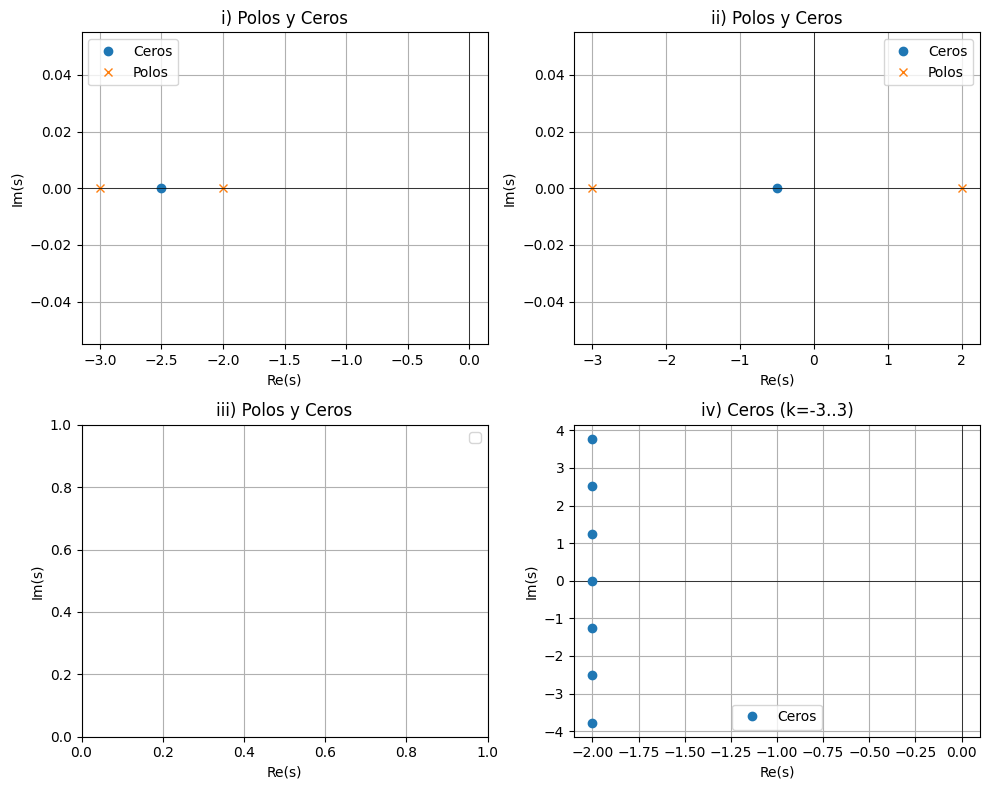

In [2]:
import sympy as sym
sym.init_printing()

import matplotlib.pyplot as plt
import numpy as np

t, s, a = sym.symbols('t s a', real=True)
a_pos = sym.symbols('a_pos', positive=True)
u = sym.Heaviside

# i)
x1 = sym.exp(-2*t)*u(t) + sym.exp(-3*t)*u(t)
L1 = sym.laplace_transform(x1, t, s)
L1_s = sym.simplify(L1[0])
print("i)", L1_s, " ROC:", L1[1])

# ii) tratamiento por partes
L2_pos = 1/(s-2)   # ROC Re(s)>2
L2_neg = 1/(s+3)   # ROC Re(s)<-3
L2_s = L2_pos + L2_neg
print("ii) X2(s) = 1/(s-2) + 1/(s+3)")
print("    ROC primera parte: Re(s)>2 ; ROC segunda parte: Re(s)<-3 (no hay intersección)")

# iii)
x3 = sym.exp(-a*sym.Abs(t))
L3 = sym.laplace_transform(sym.exp(-a*t)*u(t), t, s)[0] + \
     sym.laplace_transform(sym.exp(a*t)*u(-t), t, s)[0]
L3_s = sym.simplify(L3)
print("iii)", L3_s)
print("    ROC: -a < Re(s) < a")

# iv)
x4 = -2*t*(u(t) - u(t-5))
L4 = sym.laplace_transform(x4, t, s)
L4_s = sym.simplify(L4[0])
print("iv)", L4_s, " ROC:", L4[1])

def get_poles_zeros(expr):
    num, den = sym.fraction(sym.simplify(expr))
    # Encontrar polos y ceros simbólicos
    poles = sym.solve(sym.Eq(den, 0), s)
    zeros = sym.solve(sym.Eq(num, 0), s)
    return poles, zeros

# Obtener polos y ceros de cada inciso
p1, z1 = get_poles_zeros(L1_s)
p2, z2 = get_poles_zeros(L2_s)
p3, z3 = get_poles_zeros(L3_s)

# Para el inciso (iv):
# No hay polos, pero sí ceros infinitos. Mostraremos varios:
k_vals = np.arange(-3, 4)
zeros4 = [-2 + 1j*(2*np.pi*k/5) for k in k_vals]
p4 = []  # no hay polos verdaderos

# Función para graficar polos y ceros
def plot_pz(ax, poles, zeros, title):
    # Convertir polos
    poles_c = []
    for p in poles:
        try:
            poles_c.append(complex(sym.N(p)))
        except:
            pass

    # Convertir ceros
    zeros_c = []
    for z in zeros:
        try:
            zeros_c.append(complex(sym.N(z)))
        except:
            pass

    # Graficar ceros
    if zeros_c:
        ax.plot([z.real for z in zeros_c],
                [z.imag for z in zeros_c], 'o', label="Ceros")

    # Graficar polos
    if poles_c:
        ax.plot([p.real for p in poles_c],
                [p.imag for p in poles_c], 'x', label="Polos")

    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.grid(True)
    ax.set_xlabel("Re(s)")
    ax.set_ylabel("Im(s)")
    ax.set_title(title)
    ax.legend()

# Crear figura
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

plot_pz(axs[0], p1, z1, "i) Polos y Ceros")
plot_pz(axs[1], p2, z2, "ii) Polos y Ceros")
plot_pz(axs[2], p3, z3, "iii) Polos y Ceros")

# inciso iv: uso de ceros calculados manualmente
plot_pz(axs[3], p4, [], "iv) Ceros (k=-3..3)")
axs[3].plot([-2]*len(zeros4), [z.imag for z in zeros4], 'o', label="Ceros")
axs[3].legend()

plt.tight_layout()
plt.show()


# 2.10 Transformada inversa de LaPlace


In [3]:
import sympy as sym
t, s = sym.symbols('t s', real=True)
X = 1/((s+1)*(s+2)**2)

x_t = sym.inverse_laplace_transform(X, s, t)
sym.simplify(x_t)


⎛      t    ⎞  -2⋅t     
⎝-t + ℯ  - 1⎠⋅ℯ    ⋅θ(t)

#2.11 Autofunciones

In [4]:
import sympy as sym
sym.init_printing()

t, s, a0, a1, a2 = sym.symbols('t s a0 a1 a2')
x = sym.exp(s*t)
y = sym.Function('y')(t)

edo = sym.Eq(a0*y + a1*sym.diff(y,t) + a2*sym.diff(y,t,2), x)
solution = sym.dsolve(edo)

solution.subs({'C1':0, 'C2':0})


              s⋅t       
             ℯ          
y(t) = ─────────────────
                       2
       a₀ + a₁⋅s + a₂⋅s 

# 2.12 Función de transferencia

In [5]:
#     FUNCIONES DE TRANSFERENCIA DE CIRCUITOS RLC

import sympy as sp
sp.init_printing()

# Variables simbólicas
s = sp.symbols('s')
R, L, C = sp.symbols('R L C', positive=True)

# 1) RLC SERIE  (entrada: V_in, salida: Vc)

# Impedancias
Z_R = R
Z_L = s*L
Z_C = 1/(s*C)

# Transferencia usando divisor de tensión
H_serie = Z_C / (Z_R + Z_L + Z_C)
H_serie_simpl = sp.simplify(H_serie)

print("=== Transferencia RLC SERIE (V_in → Vc) ===")
sp.pprint(H_serie_simpl)

# Forma del denominador multiplicada por sC
H_serie_std = sp.simplify(H_serie_simpl * (s*C))
print("\nForma equivalente normalizada:")
sp.pprint(H_serie_std)

# 2) RLC PARALELO (entrada: I_in, salida: Il)

# Admitancias
Y_R = 1/R
Y_L = 1/(s*L)
Y_C = s*C

# Transferencia usando división de corriente
H_paralelo = Y_L / (Y_R + Y_L + Y_C)
H_paralelo_simpl = sp.simplify(H_paralelo)

print("\n\n=== Transferencia RLC PARALELO (I_in → Il) ===")
sp.pprint(H_paralelo_simpl)

# Forma del denominador multiplicada por sL
H_paralelo_std = sp.simplify(H_paralelo_simpl * (s*L))
print("\nForma equivalente normalizada:")
sp.pprint(H_paralelo_std)


# 3) Parámetros canónicos de segundo orden

omega0 = 1/sp.sqrt(L*C)
zeta_serie = R/2 * sp.sqrt(C/L)
zeta_paralelo = 1/(2*R) * sp.sqrt(L/C)

print("\n\n=== Parámetros canónicos ===")
print("\nomega0 = 1/sqrt(LC):")
sp.pprint(omega0)

print("\nAmortiguamiento (zeta) para RLC SERIE:")
sp.pprint(zeta_serie)

print("\nAmortiguamiento (zeta) para RLC PARALELO:")
sp.pprint(zeta_paralelo)


=== Transferencia RLC SERIE (V_in → Vc) ===
        1        
─────────────────
C⋅s⋅(L⋅s + R) + 1

Forma equivalente normalizada:
       C⋅s       
─────────────────
C⋅s⋅(L⋅s + R) + 1


=== Transferencia RLC PARALELO (I_in → Il) ===
        R         
──────────────────
       2          
C⋅L⋅R⋅s  + L⋅s + R

Forma equivalente normalizada:
      L⋅R⋅s       
──────────────────
       2          
C⋅L⋅R⋅s  + L⋅s + R


=== Parámetros canónicos ===

omega0 = 1/sqrt(LC):
  1  
─────
√C⋅√L

Amortiguamiento (zeta) para RLC SERIE:
√C⋅R
────
2⋅√L

Amortiguamiento (zeta) para RLC PARALELO:
  √L  
──────
2⋅√C⋅R
